importing libraries and load the data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [5]:
from google.colab import files
files.upload()

Saving 3.12.+Example.csv to 3.12.+Example.csv


{'3.12.+Example.csv': b'\xef\xbb\xbfSatisfaction,Loyalty\r\n4,-1.33\r\n6,-0.28\r\n5,-0.99\r\n7,-0.29\r\n4,1.06\r\n1,-1.66\r\n10,-0.97\r\n8,-0.32\r\n8,1.02\r\n8,0.68\r\n10,-0.34\r\n5,0.39\r\n5,-1.69\r\n2,0.67\r\n7,0.27\r\n9,1.36\r\n8,1.38\r\n7,1.36\r\n7,-0.34\r\n9,0.67\r\n10,1.18\r\n3,-1.69\r\n4,1.04\r\n3,-0.96\r\n6,1.03\r\n9,-0.99\r\n10,0.37\r\n9,0.03\r\n3,-1.36\r\n5,0.73\r\n'}

In [68]:
df = pd.read_csv("/content/3.12.+Example.csv")
df_c = df.copy()

In [69]:
df_c.head(), len(df)

(   Satisfaction  Loyalty
 0             4    -1.33
 1             6    -0.28
 2             5    -0.99
 3             7    -0.29
 4             4     1.06, 30)

### Kmean

In [70]:
kmean = KMeans(4)
kmean.fit(df)

KMeans(n_clusters=4)

In [71]:
cluster =kmean.predict(df)
df["cluster"] = cluster


In [72]:
df.columns

Index(['Satisfaction', 'Loyalty', 'cluster'], dtype='object')

Text(0.5, 1.0, 'clusters')

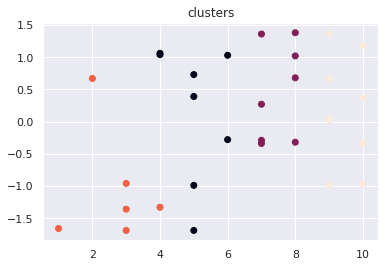

In [73]:
plt.scatter(df["Satisfaction"], df["Loyalty"], c = df["cluster"])
plt.title("clusters")

### chosing best K and standraization

Text(0.5, 1.0, 'scaled')

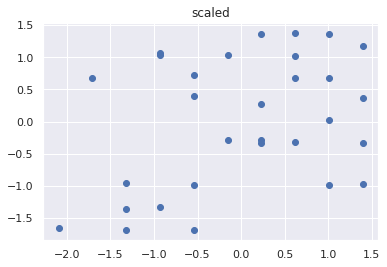

In [76]:
df_scaled = scale(df)
plt.scatter(df_scaled[:,0], df_scaled[:,1])
plt.title("scaled")

In [77]:
wcss = []
for i in range(1,10):
  kmean = KMeans(i)
  kmean.fit(df_scaled)
  wcss.append(kmean.inertia_)

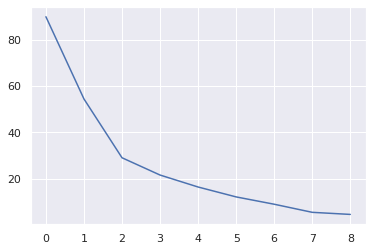

In [78]:
plt.plot(wcss)

In [79]:
  kmean = KMeans(4)
  kmean.fit(df_scaled)
  cluster = kmean.predict(df_scaled)

In [80]:
new = pd.DataFrame(df_scaled)

In [81]:
new["cluster"] = cluster

Text(0.5, 1.0, 'clusters')

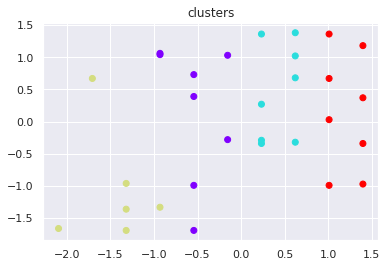

In [82]:
plt.scatter(new[0], new[1], c = df["cluster"], cmap="rainbow")
plt.title("clusters") 